In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import os 

base_dir = 'D:\\College\\Semester8\\PraSemester\\MachineLearning_ImageClass\\ProjectSkripsi\\ImageClassificationWithoutOverfitting\\dataset'
train_dir = os.path.join(base_dir, 'cats_and_dogs')
#validation_dir = os.path.join(base_dir, 'test_set')


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                    shear_range=0.1,
                                    zoom_range=0.1,
                                    horizontal_flip=True,
                                    validation_split=0.4
)

validation_datagen = ImageDataGenerator( rescale = 1.0/225, 
                                       validation_split=0.4
)


train_generator = train_datagen.flow_from_directory( train_dir,
                                                        target_size = (128, 96),
                                                        class_mode = 'binary',
                                                        shuffle=True,
                                                        subset='training')

validation_generator = validation_datagen.flow_from_directory( train_dir,
                                                                target_size = (128, 96),
                                                                class_mode = 'binary',
                                                                shuffle=True, 
                                                                subset='validation')

Found 5900 images belonging to 2 classes.
Found 3932 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 96, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 94, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 47, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8960)              0

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10
185/185 [==============================] - 44s 236ms/step - loss: 0.6758 - accuracy: 0.5707 - val_loss: 0.5788 - val_accuracy: 0.6879
Epoch 2/10
185/185 [==============================] - 43s 235ms/step - loss: 0.5798 - accuracy: 0.6974 - val_loss: 0.5863 - val_accuracy: 0.6956
Epoch 3/10
185/185 [==============================] - 44s 238ms/step - loss: 0.5272 - accuracy: 0.7380 - val_loss: 0.5575 - val_accuracy: 0.7121
Epoch 4/10
185/185 [==============================] - 44s 239ms/step - loss: 0.4776 - accuracy: 0.7684 - val_loss: 0.5093 - val_accuracy: 0.7515
Epoch 5/10
185/185 [==============================] - 45s 242ms/step - loss: 0.4612 - accuracy: 0.7841 - val_loss: 0.5142 - val_accuracy: 0.7604
Epoch 6/10
185/185 [==============================] - 44s 240ms/step - loss: 0.4340 - accuracy: 0.8005 - val_loss: 0.5084 - val_accuracy: 0.7782
Epoch 7/10
185/185 [==============================] - 45s 246ms/step - loss: 0.4020 - accuracy: 0.8183 - val_loss: 0.4434 - val_ac

Input Image is DOG


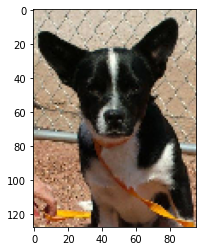

In [7]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#test_image = image.load_img('cat.1.jpg',target_size=(64,64))
#test_image = image.load_img('dog.4001.jpg',target_size=(64,64))
test_image = image.load_img('dog.4031.jpg',target_size=(128,96))

imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
if result == 0 :
    print("Input Image is CAT")
else:
    print("Input Image is DOG")


Input Image is CAT


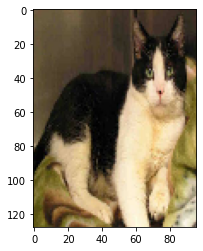

In [8]:
test_image_two = image.load_img('cat.4062.jpg',target_size=(128,96))

imgplot_two = plt.imshow(test_image_two)
test_image_two = image.img_to_array(test_image_two)
test_image_two = test_image_two/255
test_image_two= np.expand_dims(test_image_two,axis=0)
result_two = model.predict(test_image_two)
if result_two <= 0.5 :
    print("Input Image is CAT")
else:
    print("Input Image is DOG")

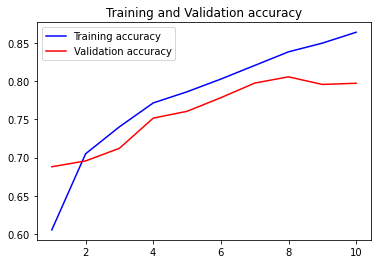

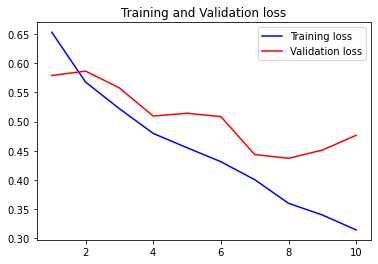

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(accuracy) + 1)

#Train and Validation accuracy
plt.plot(epoch, accuracy, 'b', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
#Train and Validation loss
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch,val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()